# Open AI gym tutorial

## Open AI gym is a toolkit for building and comparing different reinforcement learning algorithms. It is an open source interface reinforcement learning algorithms. Gym provides numerous environments to run reinforcement agents on.

You can read the original paper from [here](https://arxiv.org/abs/1606.01540)

## Installing Gym 
You need pyhton 3.5+ installed. You can use the Python package manager pip to install it using

`pip install gym`

If you would like to build the library from source you can do so using

`git clone https://github.com/openai/gym
cd gym
pip install -e .`

On colab you can run the following commands

`!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y` 

These install the requirements and the gym library. To render and display the environments you need the some libraries which can be installed by running

`!pip install pyvirtualdisplay
!pip install piglet`

For further information on Colab specific rendering and information you can read through [here](https://colab.research.google.com/drive/18LdlDDT87eb8cCTHZsXyS9ksQPzL3i6H#scrollTo=7wY4qZhPXotR)

To install all environments you can run


## Importing libraries 

In [1]:
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display
import time
import gym
from gym import wrappers
import io
import base64
from IPython.display import HTML

## You can see the available gym environments [here](https://github.com/openai/gym/blob/master/docs/environments.md)

In [2]:
all_env = list(gym.envs.registry.all())
for e in list(all_env):
    print(e)

EnvSpec(Copy-v0)
EnvSpec(RepeatCopy-v0)
EnvSpec(ReversedAddition-v0)
EnvSpec(ReversedAddition3-v0)
EnvSpec(DuplicatedInput-v0)
EnvSpec(Reverse-v0)
EnvSpec(CartPole-v0)
EnvSpec(CartPole-v1)
EnvSpec(MountainCar-v0)
EnvSpec(MountainCarContinuous-v0)
EnvSpec(Pendulum-v0)
EnvSpec(Acrobot-v1)
EnvSpec(LunarLander-v2)
EnvSpec(LunarLanderContinuous-v2)
EnvSpec(BipedalWalker-v2)
EnvSpec(BipedalWalkerHardcore-v2)
EnvSpec(CarRacing-v0)
EnvSpec(Blackjack-v0)
EnvSpec(KellyCoinflip-v0)
EnvSpec(KellyCoinflipGeneralized-v0)
EnvSpec(FrozenLake-v0)
EnvSpec(FrozenLake8x8-v0)
EnvSpec(CliffWalking-v0)
EnvSpec(NChain-v0)
EnvSpec(Roulette-v0)
EnvSpec(Taxi-v3)
EnvSpec(GuessingGame-v0)
EnvSpec(HotterColder-v0)
EnvSpec(Reacher-v2)
EnvSpec(Pusher-v2)
EnvSpec(Thrower-v2)
EnvSpec(Striker-v2)
EnvSpec(InvertedPendulum-v2)
EnvSpec(InvertedDoublePendulum-v2)
EnvSpec(HalfCheetah-v2)
EnvSpec(HalfCheetah-v3)
EnvSpec(Hopper-v2)
EnvSpec(Hopper-v3)
EnvSpec(Swimmer-v2)
EnvSpec(Swimmer-v3)
EnvSpec(Walker2d-v2)
EnvSpec(Walker2d

In [3]:
len(all_env)

859

## Example environment of cartpole 

## Definition of problem statement
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

## Basic functions and uses of gym environment functions
**make**: make is used to create the selected environment given from the parameters

**reset**: reset the environment to default state

**action_space**: all possible actions for the environment

**observation_space**: all possible observations for the environment

**render**: rendering a visual for each environment

**step**: a function where you pass the action to take for the environment

**observation**: observation noted from the environment

**reward**: reward obtained for taking the step in the environment

**done**: single boolean values which tells if the episode has ended

**info**: additional information used to debug the running of the environment

**wrappers**: extend the environment defined and allow for more features and additionial build details into the environment, can ddefine observation, action and reward wrappers individually

In [4]:
env  =  gym.make('CartPole-v0')
n_episodes = 1000
env_vis = []
for i_episode in range(n_episodes):
    observation = env.reset()
    for t in range(100):
        env_vis.append(env.render(mode='rgb_array'))
        action = env.action_space.sample()
        observation,  reward,  done,  info = env.step(action)
        if done:
            print("Episode  finished  at  t{}".format(t+1))
        break

In [5]:
def env_render(env_vis):
    plt.figure()
    plot = plt.imshow(env_vis[0])
    plt.axis('off')


def animate(i):
    plot.set_data(env_vis[i])
    anim = anm.FuncAnimation(plt.gcf(), animate, frames=len(env_vis), interval=24000, repeat=True, repeat_delay=2)
    display(display_animation(anim, default_mode='loop'))

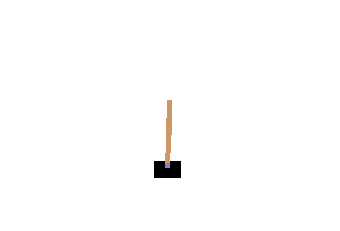

In [6]:
env_render(env_vis)

## Example environment of space invaders

## Definition of problem statement
Maximize your score in the Atari 2600 game SpaceInvaders. In this environment, the observation is an RGB image of the screen, which is an array of shape (210, 160, 3) Each action is repeatedly performed for a duration of k frames, where k is uniformly sampled from {2,3,4}.

In [7]:
env = gym.make('SpaceInvaders-v0')
env = wrappers.Monitor(env, "./gym-visuals", force=True)
env.reset()
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close()

In [8]:
video = io.open('./gym-visuals/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))